**Beta Cell Metabolism: Tabula Muris**


This project **Clustering Beta Cells from Tabula Muris** focuses on creation of a beta-cell subset from a dataset consisting of the pancreatic cells by using various scanpy functions related to data preprocessing, scaling , normalisation, visualisation, clustering and statistical testing.
<br>

**Insights into the dataset:**

The chosen dataset is taken from the Tabula Muris paper
<br>
https://www.nature.com/articles/s41586-018-0590-4
<br>
https://figshare.com/projects/Tabula_Muris_Transcriptomic_characterization_of_20_organs_and_tissues_from_Mus_musculus_at_single_cell_resolution/27733. 
<br>It consists of the Pancreatic Datasets obtained from the FACS(fluorescence-activated cell sorting) as well as the Droplet (microfluidic droplet method) Method. FACS and Droplet are the two methods for cell sorting. The data structure used is known as the AnnData which basically stands for "annotated data," and is the standard format used by the analysis library, Scanpy. 



**IMPORTING LIBRARIES**

In [2]:
 from google.colab import drive #mount the drive to access the files 
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
#installing the libaries 
!pip install scanpy
!pip install jgraph

     |████████████████████████████████| 7.7MB 2.7MB/s 
     |████████████████████████████████| 122kB 44.8MB/s 
     |████████████████████████████████| 51kB 5.4MB/s 
     |████████████████████████████████| 61kB 5.8MB/s 
  Created wheel for sinfo: filename=sinfo-0.3.1-cp36-none-any.whl size=7016 sha256=1e133517c6a0aa6d51a11c979ca4928552301039cca396c964e3ae121fb55f7a
  Stored in directory: /root/.cache/pip/wheels/11/f0/23/347d6d8e59787c2bc272162d18223dc3b45bd6dc40aceee6af
Successfully built sinfo
     |████████████████████████████████| 122kB 2.8MB/s 


In [4]:
#importing the libaries required 
import pandas as pd #load in the pandas library for working with dataframes
import seaborn as sns #load in the python data visualization library 
import numpy as np #load in the numerical python library 
import scanpy as sc #load in the single-cell analysis library
import matplotlib.pyplot as plt #load in the visualisations
from jgraph import * #load in the graphs

sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_versions()
sc.settings.set_figure_params(dpi=80)

#These are the file paths from where the dataset will be accessed which can be modified as per user needs
FACS = sc.read_h5ad('./drive/My Drive/Beta_Cell_Metabolism/Beta_Clustering/data/TM_facs_mat.h5ad')
FACS_md = pd.read_csv('./drive/My Drive/Beta_Cell_Metabolism/Beta_Clustering/data/TM_facs_metadata.csv')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


-----
anndata     0.7.4
scanpy      1.6.0
sinfo       0.3.1
-----
PIL                 7.0.0
anndata             0.7.4
bottleneck          1.3.2
cffi                1.14.2
cloudpickle         1.3.0
cycler              0.10.0
cython_runtime      NA
dask                2.12.0
dataclasses         NA
dateutil            2.8.1
decorator           4.4.2
get_version         2.1
google              NA
h5py                2.10.0
importlib_metadata  1.7.0
ipykernel           4.10.1
ipython_genutils    0.2.0
ipywidgets          7.5.1
jgraph              0.2.1
joblib              0.16.0
kiwisolver          1.2.0
legacy_api_wrap     1.2
llvmlite            0.31.0
matplotlib          3.2.2
mpl_toolkits        NA
natsort             5.5.0
numba               0.48.0
numexpr             2.7.1
numpy               1.18.5
packaging           20.4
pandas              1.0.5
pexpect             4.8.0
pickleshare         0.7.5
pkg_resources       NA
prompt_toolkit      1.0.18
psutil              5.4.8
ptyproce

We are going to create the AnnData Object which consists of all the cells derieved from Tabula Muris and we will be creating a subset for beta cells to find important marker genes

In [5]:
FACS.obs = FACS_md #To create the AnnData Object and to inspect general info about the object FACS
FACS.obs

,cell,plate.barcode,mouse.id,tissue,subtissue,FACS.selection,mouse.sex,method,cell_ontology_class,cell_ontology_id,free_annotation
0,A1.B000126.3_39_F.1.1,B000126,3_39_F,Skin,Telogen,Multiple,F,facs,epidermal cell,CL:0000362,Intermediate IFE
1,A1.B000127.3_38_F.1.1,B000127,3_38_F,Fat,SCAT,Multiple,F,facs,endothelial cell,CL:0000115,NaN
2,A1.B000167.3_56_F.1.1,B000167,3_56_F,Mammary_Gland,Mammary_Gland,Multiple,F,facs,basal cell,CL:0000646,NaN
3,A1.B000168.3_57_F.1.1,B000168,3_57_F,Mammary_Gland,Mammary_Gland,Multiple,F,facs,NaN,NaN,NaN
4,A1.B000412.3_56_F.1.1,B000412,3_56_F,Heart,RA,Viable,F,facs,endothelial cell,CL:0000115,NaN
...,...,...,...,...,...,...,...,...,...,...,...
53755,P9.MAA001887.3_39_F.1.1,MAA001887,3_39_F,Marrow,KLS,Multiple,F,facs,Slamf1-negative multipotent progenitor cell,CL:0002035,NaN
53756,P9.MAA001888.3_39_F.1.1,MAA001888,3_39_F,Marrow,T-cells,Multiple,F,facs,regulatory T cell,CL:0000815,NaN
53757,P9.MAA001889.3_38_F.1.1,MAA001889,3_38_F,Lung,EPCAM,Multiple,F,facs,B cell,CL:0000236,NaN
53758,P9.MAA001892.3_38_F.1.1,MAA001892,3_38_F,Lung,Endomucin,Multiple,F,facs,lung endothelial cell,CL:1001567,NaN


The above table for FACS dataset denotes the annotations of the variables, i.e. the genes. The files has 11 columns: cell,	plate.barcode,mouse.id,	tissue,	subtissue,	FACS.selection,	mouse.sex,	method,	cell_ontology_class,	cell_ontology_id,	free_annotation

Now we will be creating a subset for only Tissue Pancreas from the Tabula Muris

In [6]:
pancreas = FACS[FACS.obs.tissue == 'Pancreas'] #To create a subset which contains only Tissue Pancreas
print (pancreas)
pancreas.obs #To inspect the key-indexed observations annotation (obs) of the dataset which contains only Pancreatic B cells

View of AnnData object with n_obs × n_vars = 1961 × 23433
    obs: 'cell', 'plate.barcode', 'mouse.id', 'tissue', 'subtissue', 'FACS.selection', 'mouse.sex', 'method', 'cell_ontology_class', 'cell_ontology_id', 'free_annotation'


,cell,plate.barcode,mouse.id,tissue,subtissue,FACS.selection,mouse.sex,method,cell_ontology_class,cell_ontology_id,free_annotation
84,A1.MAA000574.3_8_M.1.1,MAA000574,3_8_M,Pancreas,Exocrine,Viable,M,facs,NaN,NaN,NaN
115,A1.MAA000884.3_10_M.1.1,MAA000884,3_10_M,Pancreas,Endocrine,Viable,M,facs,pancreatic A cell,CL:0000171,pancreatic A cell
150,A1.MAA001861.3_39_F.1.1,MAA001861,3_39_F,Pancreas,Exocrine,Viable,F,facs,NaN,NaN,NaN
151,A1.MAA001862.3_39_F.1.1,MAA001862,3_39_F,Pancreas,Endocrine,Viable,F,facs,pancreatic A cell,CL:0000171,pancreatic A cell
154,A1.MAA001868.3_38_F.1.1,MAA001868,3_38_F,Pancreas,Exocrine,Viable,F,facs,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
53715,P9.MAA000884.3_10_M.1.1,MAA000884,3_10_M,Pancreas,Endocrine,Viable,M,facs,NaN,NaN,NaN
53723,P9.MAA000910.3_10_M.1.1,MAA000910,3_10_M,Pancreas,Exocrine,Viable,M,facs,NaN,NaN,NaN
53744,P9.MAA001857.3_38_F.1.1,MAA001857,3_38_F,Pancreas,Endocrine,Viable,F,facs,pancreatic A cell,CL:0000171,pancreatic A cell
53745,P9.MAA001861.3_39_F.1.1,MAA001861,3_39_F,Pancreas,Exocrine,Viable,F,facs,pancreatic acinar cell,CL:0002064,acinar cell


The above table for pancreas dataset denotes the annotations of the variables, i.e. the genes. The files has 11 columns: cell,	plate.barcode, mouse.id,	tissue,	subtissue,	FACS.selection, mouse.sex,	method,	cell_ontology_class,	cell_ontology_id,	free_annotation

We will be checking if pancreas has any null values 

In [7]:
type(pancreas.obs["cell_ontology_class"][84]), pancreas.obs["cell_ontology_class"][84]  #To check if there are any null values in the dataset
pancreas.obs['cell_ontology_class'].isnull() 
pancreas.obs.reset_index(inplace=True) 

In [8]:
pancreas = pancreas[pancreas.obs['cell_ontology_class'].isnull()!=True,:]
pancreas.obs #To inspect if all the null values have beeen removed 

,cell,plate.barcode,mouse.id,tissue,subtissue,FACS.selection,mouse.sex,method,cell_ontology_class,cell_ontology_id,free_annotation
115,A1.MAA000884.3_10_M.1.1,MAA000884,3_10_M,Pancreas,Endocrine,Viable,M,facs,pancreatic A cell,CL:0000171,pancreatic A cell
151,A1.MAA001862.3_39_F.1.1,MAA001862,3_39_F,Pancreas,Endocrine,Viable,F,facs,pancreatic A cell,CL:0000171,pancreatic A cell
292,A10.MAA000884.3_10_M.1.1,MAA000884,3_10_M,Pancreas,Endocrine,Viable,M,facs,type B pancreatic cell,CL:0000169,beta cell
321,A10.MAA001857.3_38_F.1.1,MAA001857,3_38_F,Pancreas,Endocrine,Viable,F,facs,pancreatic A cell,CL:0000171,pancreatic A cell
438,A11.MAA000577.3_8_M.1.1,MAA000577,3_8_M,Pancreas,Endocrine,Viable,M,facs,pancreatic A cell,CL:0000171,pancreatic A cell
...,...,...,...,...,...,...,...,...,...,...,...
53541,P8.MAA000910.3_10_M.1.1,MAA000910,3_10_M,Pancreas,Exocrine,Viable,M,facs,pancreatic acinar cell,CL:0002064,acinar cell
53567,P8.MAA001857.3_38_F.1.1,MAA001857,3_38_F,Pancreas,Endocrine,Viable,F,facs,pancreatic A cell,CL:0000171,pancreatic A cell
53681,P9.MAA000574.3_8_M.1.1,MAA000574,3_8_M,Pancreas,Exocrine,Viable,M,facs,pancreatic acinar cell,CL:0002064,acinar cell
53744,P9.MAA001857.3_38_F.1.1,MAA001857,3_38_F,Pancreas,Endocrine,Viable,F,facs,pancreatic A cell,CL:0000171,pancreatic A cell


The above table for pancreas dataset denotes the annotations of the variables, i.e. the genes. The files has 11 columns:cell,	plate.barcode,	mouse.id,	tissue,	subtissue,	FACS.selection,	mouse.sex,	method,	cell_ontology_class,	cell_ontology_id,	free_annotation
<br>


In [9]:
pancreas

View of AnnData object with n_obs × n_vars = 1564 × 23433
    obs: 'cell', 'plate.barcode', 'mouse.id', 'tissue', 'subtissue', 'FACS.selection', 'mouse.sex', 'method', 'cell_ontology_class', 'cell_ontology_id', 'free_annotation'

**BASIC PREPROCESSING** 
<br>
Since our dataset consists of many poor quality cells and has batch effects from random genes. We will process the data in the following way
 
 Preprocessing consists of the following:
 <br>
 1)Filtering of low-quality cells 
 <br>
 2)Quality control
 <br>
 3)Normalization 
<br>
4)Selection of features
<br>
5)Scaling the data
<br>
6)Dimensionality reduction

In [10]:
sc.pp.filter_genes(pancreas, min_cells=5)  #This function removes the genes based on the number of cells or counts (here number is set to 5)
sc.pp.filter_cells(pancreas, min_genes=500)#This function removes the cell outliers based on counts and numbers of genes expressed  (here number is set to 500)

filtered out 6348 genes that are detected in less than 5 cells


Trying to set attribute `.var` of view, copying.
/usr/local/lib/python3.6/dist-packages/anndata/_core/anndata.py:119: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


The dataset contains alot of non-biological factors which can get expressed instead of the important genes and hence give inaccurate results and hence the below code is to remove the spike-ins called 'ERCC' from the pancreas.var which denotes the variables (gene) 

In [11]:
is_spike_in = {}
number_of_spike_ins = 0

for gene_name in pancreas.var_names:
    if 'ERCC' in gene_name:
        is_spike_in[gene_name] = True # record that we found a spike-in
        number_of_spike_ins += 1 # bump the counter
    else:
        is_spike_in[gene_name] = False # record that this was not a spike-in
        
pancreas.var['ERCC'] = pd.Series(is_spike_in) # because the index of adata.var and the keys of is_spike_in match, anndata will take care of matching them up
print('found this many spike ins: ', number_of_spike_ins)

found this many spike ins:  61


In [12]:
pancreas.var['ERCC'] = pancreas.var_names.str.startswith('ERCC-')  # annotate the group of ERCC genes as 'ERCC'
sc.pp.calculate_qc_metrics(pancreas, qc_vars=['ERCC'], percent_top=None, log1p=False, inplace=True)#To calculate quality control metrics
#this returns a table of number of cells and number of genes 

In [13]:
pancreas.var #To inspect the Key-indexed annotation of variables/features (var) of the dataset created 

,n_cells,ERCC,n_cells_by_counts,mean_counts,pct_dropout_by_counts,total_counts
index,,,,,,
0610005C13Rik,21,False,21,0.200767,98.657289,314.0
0610007C21Rik,1248,False,1248,247.942459,20.204604,387782.0
0610007L01Rik,1037,False,1037,104.419434,33.695652,163312.0
0610007N19Rik,537,False,537,18.648338,65.664962,29166.0
0610007P08Rik,498,False,498,26.544117,68.158568,41515.0
...,...,...,...,...,...,...
Zyx,460,False,460,29.368286,70.588235,45932.0
Zzef1,824,False,824,47.480820,47.314578,74260.0
Zzz3,777,False,777,43.565216,50.319693,68136.0


The above table for pancreas dataset denotes the annotations of the variables, i.e. the genes. The files now has 6 columns: n_cells,	ERCC,	n_cells_by_counts,mean_counts,	pct_dropout_by_counts,	total_counts

*We will be complelely getting rid of the spikes-in 'ERCC' using the following code*

In [14]:
idx2 = [] #ERCC is completely removed
for i in range(len(pancreas.var.index)):
  if "ERCC" in pancreas.var.index[i]:
    idx2.append(pancreas.var.index[i])
    print(pancreas.var.index[i])

ERCC-00002
ERCC-00003
ERCC-00004
ERCC-00009
ERCC-00014
ERCC-00019
ERCC-00022
ERCC-00025
ERCC-00028
ERCC-00031
ERCC-00033
ERCC-00034
ERCC-00035
ERCC-00039
ERCC-00042
ERCC-00043
ERCC-00044
ERCC-00046
ERCC-00051
ERCC-00053
ERCC-00054
ERCC-00058
ERCC-00059
ERCC-00060
ERCC-00062
ERCC-00067
ERCC-00071
ERCC-00074
ERCC-00076
ERCC-00077
ERCC-00078
ERCC-00079
ERCC-00084
ERCC-00085
ERCC-00092
ERCC-00095
ERCC-00096
ERCC-00099
ERCC-00108
ERCC-00111
ERCC-00112
ERCC-00113
ERCC-00116
ERCC-00126
ERCC-00130
ERCC-00131
ERCC-00136
ERCC-00143
ERCC-00144
ERCC-00145
ERCC-00147
ERCC-00148
ERCC-00150
ERCC-00154
ERCC-00157
ERCC-00160
ERCC-00162
ERCC-00163
ERCC-00165
ERCC-00170
ERCC-00171


In [15]:
pancreas.var.drop(index = idx2, inplace=True)

In [16]:
for i in range(len(pancreas.var.index)):
  if "ERCC" in pancreas.var.index[i]:
    print(pancreas.var.index[i])

In [17]:
pancreas

AnnData object with n_obs × n_vars = 1564 × 17085
    obs: 'cell', 'plate.barcode', 'mouse.id', 'tissue', 'subtissue', 'FACS.selection', 'mouse.sex', 'method', 'cell_ontology_class', 'cell_ontology_id', 'free_annotation', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_ERCC', 'pct_counts_ERCC'
    var: 'n_cells', 'ERCC', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'

... storing 'plate.barcode' as categorical
... storing 'mouse.id' as categorical
... storing 'tissue' as categorical
... storing 'subtissue' as categorical
... storing 'FACS.selection' as categorical
... storing 'mouse.sex' as categorical
... storing 'method' as categorical
... storing 'cell_ontology_class' as categorical
... storing 'cell_ontology_id' as categorical
... storing 'free_annotation' as categorical


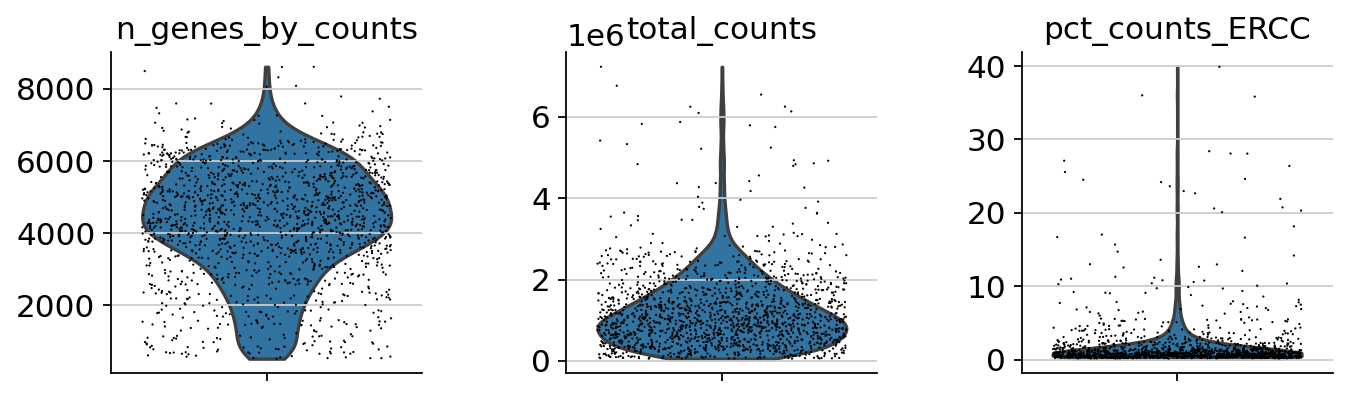

In [18]:
sc.pl.violin(pancreas, ['n_genes_by_counts', 'total_counts', 'pct_counts_ERCC'],
             jitter=0.4, multi_panel=True)  #Plotted violin plot for the the quality metrics [n_genes_by_counts, total_counts, pct_counts_ERCC]

The violin plot n_genes_by_count shows that the number of genes expressed in the cell count matrix. The genes are concentrated in the range of 0-8000
<br>
The violin plot total_count shows the total counts per cell which lies in the range of 0-15000 
<br>
The violin plot pct_counts_ERCC shows the total number of counts in ERCC genes which lies in the range of 0-10

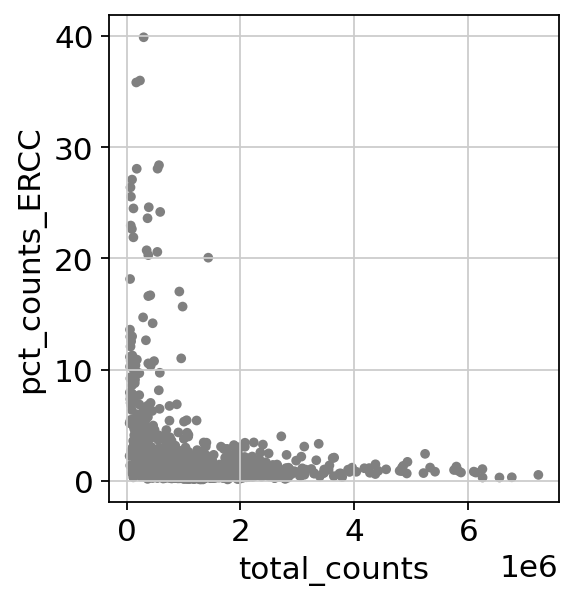

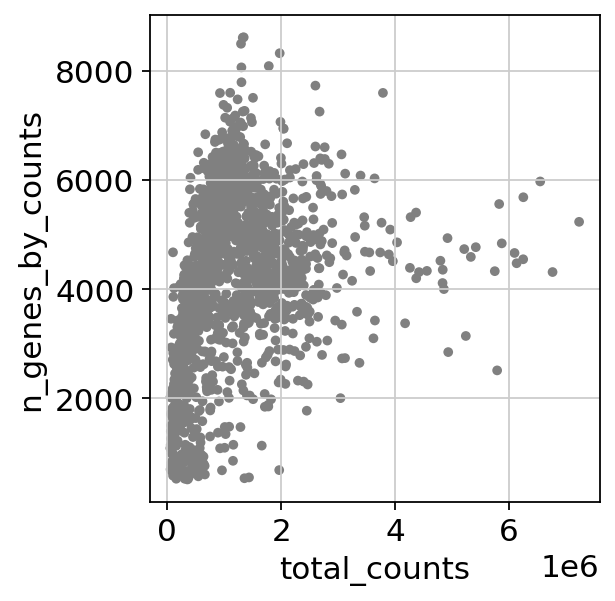

In [19]:
sc.pl.scatter(pancreas, x='total_counts', y='pct_counts_ERCC') #Plotting a scatter plot for total_counts vs pct_counts_ERCC
sc.pl.scatter(pancreas, x='total_counts', y='n_genes_by_counts') #Plotting a scatter plot for total_counts vs n_genes_by_counts

**Filtering** 

In [20]:
#removing the cells in which number of genes per cell has a count of less than 8000 genes per cell
pancreas_filtered = pancreas[pancreas.obs.n_genes_by_counts < 8000, :] #creation of the filtered dataset

In [21]:
pancreas_filtered #To inspect general info about the filtered object pancreas

View of AnnData object with n_obs × n_vars = 1558 × 17024
    obs: 'cell', 'plate.barcode', 'mouse.id', 'tissue', 'subtissue', 'FACS.selection', 'mouse.sex', 'method', 'cell_ontology_class', 'cell_ontology_id', 'free_annotation', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_ERCC', 'pct_counts_ERCC'
    var: 'n_cells', 'ERCC', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'

The processed pancreas data contains the following
<br>
There are 1558 observations which are the number of cells (n_obs)
<br>
There are 17024 variables which denotes the genes (n_var)

In [22]:
pancreas_filtered.obs  #To inspect the key-indexed observations annotation (obs) of the filtered dataset

,cell,plate.barcode,mouse.id,tissue,subtissue,FACS.selection,mouse.sex,method,cell_ontology_class,cell_ontology_id,free_annotation,n_genes,n_genes_by_counts,total_counts,total_counts_ERCC,pct_counts_ERCC
115,A1.MAA000884.3_10_M.1.1,MAA000884,3_10_M,Pancreas,Endocrine,Viable,M,facs,pancreatic A cell,CL:0000171,pancreatic A cell,4270,4270,644255.0,5383.0,0.835539
151,A1.MAA001862.3_39_F.1.1,MAA001862,3_39_F,Pancreas,Endocrine,Viable,F,facs,pancreatic A cell,CL:0000171,pancreatic A cell,5914,5914,815377.0,3892.0,0.477325
292,A10.MAA000884.3_10_M.1.1,MAA000884,3_10_M,Pancreas,Endocrine,Viable,M,facs,type B pancreatic cell,CL:0000169,beta cell,4758,4758,647471.0,4326.0,0.668138
321,A10.MAA001857.3_38_F.1.1,MAA001857,3_38_F,Pancreas,Endocrine,Viable,F,facs,pancreatic A cell,CL:0000171,pancreatic A cell,4989,4989,1172653.0,9549.0,0.814307
438,A11.MAA000577.3_8_M.1.1,MAA000577,3_8_M,Pancreas,Endocrine,Viable,M,facs,pancreatic A cell,CL:0000171,pancreatic A cell,3764,3764,1706283.0,15487.0,0.907645
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53541,P8.MAA000910.3_10_M.1.1,MAA000910,3_10_M,Pancreas,Exocrine,Viable,M,facs,pancreatic acinar cell,CL:0002064,acinar cell,1808,1808,395791.0,25856.0,6.532741
53567,P8.MAA001857.3_38_F.1.1,MAA001857,3_38_F,Pancreas,Endocrine,Viable,F,facs,pancreatic A cell,CL:0000171,pancreatic A cell,5936,5936,1548000.0,8818.0,0.569638
53681,P9.MAA000574.3_8_M.1.1,MAA000574,3_8_M,Pancreas,Exocrine,Viable,M,facs,pancreatic acinar cell,CL:0002064,acinar cell,600,600,328084.0,16701.0,5.090465
53744,P9.MAA001857.3_38_F.1.1,MAA001857,3_38_F,Pancreas,Endocrine,Viable,F,facs,pancreatic A cell,CL:0000171,pancreatic A cell,2306,2306,361470.0,14348.0,3.969347


In [23]:
pancreas_filtered.write('/content/drive/My Drive/Beta_Cell_Metabolism/Beta_Clustering/Pancreas_filtered.h5ad') #save the filtered file

**Normalisation**

In [24]:
pancreas_filtered.obs #To inspect the  key-indexed observations annotation (obs) of the filtered dataset

,cell,plate.barcode,mouse.id,tissue,subtissue,FACS.selection,mouse.sex,method,cell_ontology_class,cell_ontology_id,free_annotation,n_genes,n_genes_by_counts,total_counts,total_counts_ERCC,pct_counts_ERCC
115,A1.MAA000884.3_10_M.1.1,MAA000884,3_10_M,Pancreas,Endocrine,Viable,M,facs,pancreatic A cell,CL:0000171,pancreatic A cell,4270,4270,644255.0,5383.0,0.835539
151,A1.MAA001862.3_39_F.1.1,MAA001862,3_39_F,Pancreas,Endocrine,Viable,F,facs,pancreatic A cell,CL:0000171,pancreatic A cell,5914,5914,815377.0,3892.0,0.477325
292,A10.MAA000884.3_10_M.1.1,MAA000884,3_10_M,Pancreas,Endocrine,Viable,M,facs,type B pancreatic cell,CL:0000169,beta cell,4758,4758,647471.0,4326.0,0.668138
321,A10.MAA001857.3_38_F.1.1,MAA001857,3_38_F,Pancreas,Endocrine,Viable,F,facs,pancreatic A cell,CL:0000171,pancreatic A cell,4989,4989,1172653.0,9549.0,0.814307
438,A11.MAA000577.3_8_M.1.1,MAA000577,3_8_M,Pancreas,Endocrine,Viable,M,facs,pancreatic A cell,CL:0000171,pancreatic A cell,3764,3764,1706283.0,15487.0,0.907645
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53541,P8.MAA000910.3_10_M.1.1,MAA000910,3_10_M,Pancreas,Exocrine,Viable,M,facs,pancreatic acinar cell,CL:0002064,acinar cell,1808,1808,395791.0,25856.0,6.532741
53567,P8.MAA001857.3_38_F.1.1,MAA001857,3_38_F,Pancreas,Endocrine,Viable,F,facs,pancreatic A cell,CL:0000171,pancreatic A cell,5936,5936,1548000.0,8818.0,0.569638
53681,P9.MAA000574.3_8_M.1.1,MAA000574,3_8_M,Pancreas,Exocrine,Viable,M,facs,pancreatic acinar cell,CL:0002064,acinar cell,600,600,328084.0,16701.0,5.090465
53744,P9.MAA001857.3_38_F.1.1,MAA001857,3_38_F,Pancreas,Endocrine,Viable,F,facs,pancreatic A cell,CL:0000171,pancreatic A cell,2306,2306,361470.0,14348.0,3.969347


The above table for pancreas dataset denotes the annotations of the variables, i.e. the genes. The files has 16 columns: cell,	plate.barcode,	mouse.id,	tissue,	subtissue,	FACS.selection,	mouse.sex	method, cell_ontology_class,	cell_ontology_id, free_annotation,	n_genes,	n_genes_by_counts, total_counts,	total_counts_ERCC,	pct_counts_ERCC

In [25]:
pancreas_filtered #To inspect general info about the filtered object 

View of AnnData object with n_obs × n_vars = 1558 × 17024
    obs: 'cell', 'plate.barcode', 'mouse.id', 'tissue', 'subtissue', 'FACS.selection', 'mouse.sex', 'method', 'cell_ontology_class', 'cell_ontology_id', 'free_annotation', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_ERCC', 'pct_counts_ERCC'
    var: 'n_cells', 'ERCC', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'

The dataset as well contains an offending gene, Rn45s. Hence it is important to remove the offending gene

In [26]:
not_Rn45s = pancreas_filtered.var.index != 'Rn45s' #Removing Rn45s as it is an offending gene
pancreas_normalize = pancreas_filtered[:, not_Rn45s] #creating a variable pancreas_normalize which does not contain the gene Rns45s

In [27]:
pancreas_normalize.var #To inspect the Key-indexed annotation of variables/features (var) of the dataset created

,n_cells,ERCC,n_cells_by_counts,mean_counts,pct_dropout_by_counts,total_counts
index,,,,,,
0610005C13Rik,21,False,21,0.200767,98.657289,314.0
0610007C21Rik,1248,False,1248,247.942459,20.204604,387782.0
0610007L01Rik,1037,False,1037,104.419434,33.695652,163312.0
0610007N19Rik,537,False,537,18.648338,65.664962,29166.0
0610007P08Rik,498,False,498,26.544117,68.158568,41515.0
...,...,...,...,...,...,...
Zyx,460,False,460,29.368286,70.588235,45932.0
Zzef1,824,False,824,47.480820,47.314578,74260.0
Zzz3,777,False,777,43.565216,50.319693,68136.0


The above table for pancreas dataset denotes the annotations of the variables, i.e. the genes. The files has 6 columns:n_cells,	ERCC,	n_cells_by_counts,	mean_counts,	pct_dropout_by_counts,	total_counts

In [28]:
pancreas_normalize #To inspect general info about the normalized object pancreas_normalize

View of AnnData object with n_obs × n_vars = 1558 × 17023
    obs: 'cell', 'plate.barcode', 'mouse.id', 'tissue', 'subtissue', 'FACS.selection', 'mouse.sex', 'method', 'cell_ontology_class', 'cell_ontology_id', 'free_annotation', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_ERCC', 'pct_counts_ERCC'
    var: 'n_cells', 'ERCC', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'

The processed pancreas data contains 
<br>
There are 1558 observations which are the number of cells (n_obs)
<br>
There are 17023 variables which denotes the genes (n_var)

In [29]:
sc.pp.normalize_total(pancreas_normalize, target_sum=1e4) #Normalize counts per cell, reduce the dataset from X to 10,000 reads per cells so that counts become comparable to the cells

normalizing counts per cell
    finished (0:00:00)


/usr/local/lib/python3.6/dist-packages/scanpy/preprocessing/_normalization.py:138: UserWarning: Revieved a view of an AnnData. Making a copy.
  view_to_actual(adata)


In [30]:
sc.pp.log1p(pancreas_normalize) #Logarithmize the dataset

In [31]:
pancreas_normalize.write('/content/drive/My Drive/Beta_Cell_Metabolism/Beta_Clustering/pancreas_normalized.h5ad')  #save the normalized file

**Creating a subset**
<br>
We will create a subset which contains only Pancreatic B cells 

In [32]:
pancreas_normalize = sc.read('/content/drive/My Drive/Beta_Cell_Metabolism/Beta_Clustering/pancreas_normalized.h5ad') #read the normalized file

In [33]:
pancreas_normalize #To inspect general info about the normalized object pancreas_normalize

AnnData object with n_obs × n_vars = 1558 × 17023
    obs: 'cell', 'plate.barcode', 'mouse.id', 'tissue', 'subtissue', 'FACS.selection', 'mouse.sex', 'method', 'cell_ontology_class', 'cell_ontology_id', 'free_annotation', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_ERCC', 'pct_counts_ERCC'
    var: 'n_cells', 'ERCC', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'

In [34]:
B = pancreas_normalize[pancreas_normalize.obs["free_annotation"] == "beta cell", :] #creating a subset which contains only pancreatic B cells
B.obs  # To inspect the key-indexed observations annotation (obs) of the dataset which contains only Pancreatic B cells

,cell,plate.barcode,mouse.id,tissue,subtissue,FACS.selection,mouse.sex,method,cell_ontology_class,cell_ontology_id,free_annotation,n_genes,n_genes_by_counts,total_counts,total_counts_ERCC,pct_counts_ERCC
292,A10.MAA000884.3_10_M.1.1,MAA000884,3_10_M,Pancreas,Endocrine,Viable,M,facs,type B pancreatic cell,CL:0000169,beta cell,4758,4758,647471.0,4326.0,0.668138
493,A11.MAA001861.3_39_F.1.1,MAA001861,3_39_F,Pancreas,Exocrine,Viable,F,facs,type B pancreatic cell,CL:0000169,beta cell,5403,5403,614521.0,3512.0,0.571502
635,A12.MAA000884.3_10_M.1.1,MAA000884,3_10_M,Pancreas,Endocrine,Viable,M,facs,type B pancreatic cell,CL:0000169,beta cell,4737,4737,832950.0,2803.0,0.336515
774,A13.MAA000577.3_8_M.1.1,MAA000577,3_8_M,Pancreas,Endocrine,Viable,M,facs,type B pancreatic cell,CL:0000169,beta cell,4830,4830,1449064.0,6885.0,0.475134
933,A14.MAA000577.3_8_M.1.1,MAA000577,3_8_M,Pancreas,Endocrine,Viable,M,facs,type B pancreatic cell,CL:0000169,beta cell,4310,4310,1249395.0,9898.0,0.792223
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53006,P5.MAA001862.3_39_F.1.1,MAA001862,3_39_F,Pancreas,Endocrine,Viable,F,facs,type B pancreatic cell,CL:0000169,beta cell,6028,6028,889882.0,3239.0,0.363981
53146,P6.MAA000884.3_10_M.1.1,MAA000884,3_10_M,Pancreas,Endocrine,Viable,M,facs,type B pancreatic cell,CL:0000169,beta cell,2969,2969,204068.0,5286.0,2.590313
53180,P6.MAA001862.3_39_F.1.1,MAA001862,3_39_F,Pancreas,Endocrine,Viable,F,facs,type B pancreatic cell,CL:0000169,beta cell,6109,6109,1241586.0,4934.0,0.397395
53303,P7.MAA000577.3_8_M.1.1,MAA000577,3_8_M,Pancreas,Endocrine,Viable,M,facs,type B pancreatic cell,CL:0000169,beta cell,5782,5782,2021472.0,7622.0,0.377052


In [35]:
B.obs.cell_ontology_class #To check if the cell ontology consists of only beta cells

292      type B pancreatic cell
493      type B pancreatic cell
635      type B pancreatic cell
774      type B pancreatic cell
933      type B pancreatic cell
                  ...          
53006    type B pancreatic cell
53146    type B pancreatic cell
53180    type B pancreatic cell
53303    type B pancreatic cell
53370    type B pancreatic cell
Name: cell_ontology_class, Length: 447, dtype: category
Categories (1, object): [type B pancreatic cell]

**Selection of the Features**
<br>
We will create a dataset which contains only the highly expressed genes

normalizing counts per cell
    finished (0:00:00)


/usr/local/lib/python3.6/dist-packages/scanpy/preprocessing/_normalization.py:138: UserWarning: Revieved a view of an AnnData. Making a copy.
  view_to_actual(adata)


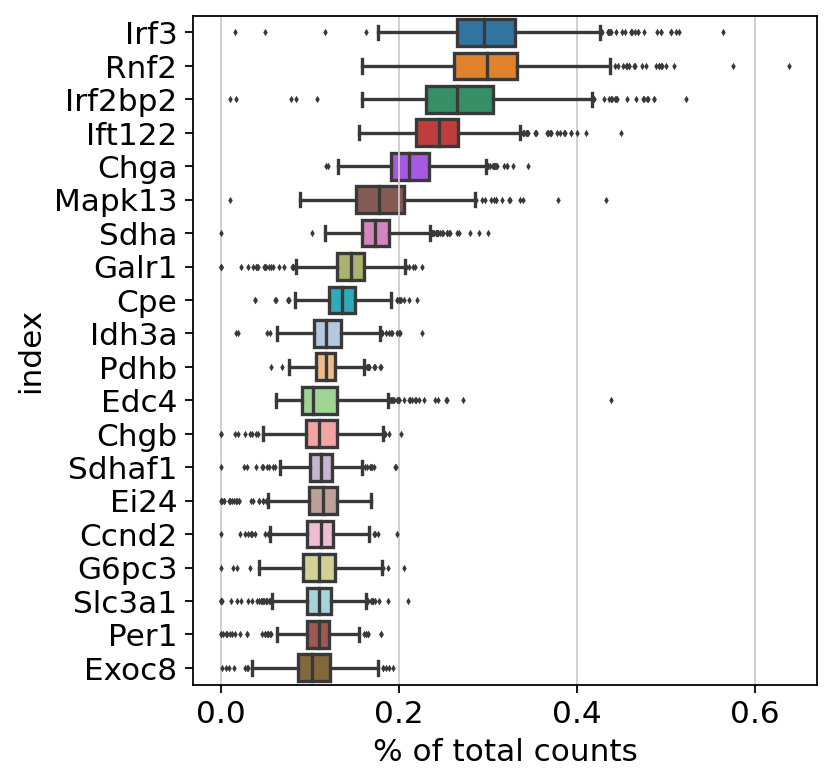

In [36]:
sc.pl.highest_expr_genes(B, n_top=20, ) #Annotate highly variable genes 

The top three genes are Irf3, Rnf2, Irf2bp2

In [37]:
sc.pp.highly_variable_genes(B, min_mean=0.0125, max_mean=3, min_disp=0.5) #identify the highly variable genes and we will keep the dataset which will contain only the highly variable genes 

extracting highly variable genes
    finished (0:00:01)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)


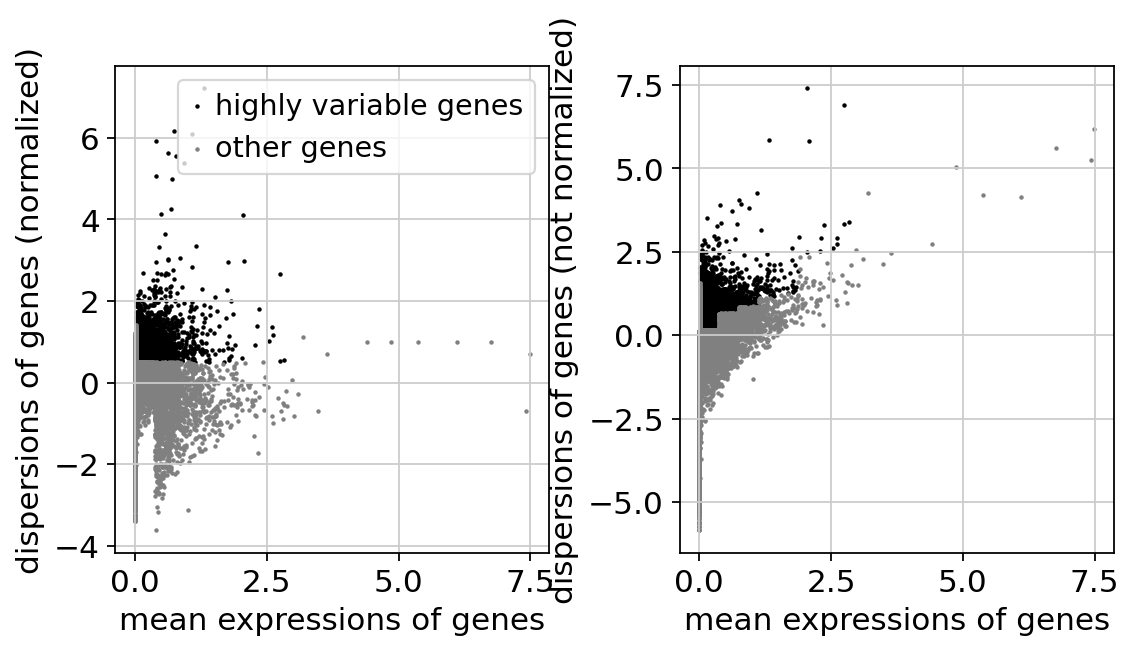

In [38]:
sc.pl.highly_variable_genes(B) #scatter plot of the highly variable genes dataset

In [39]:
B #To inspect general info about the object

AnnData object with n_obs × n_vars = 447 × 17023
    obs: 'cell', 'plate.barcode', 'mouse.id', 'tissue', 'subtissue', 'FACS.selection', 'mouse.sex', 'method', 'cell_ontology_class', 'cell_ontology_id', 'free_annotation', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_ERCC', 'pct_counts_ERCC'
    var: 'n_cells', 'ERCC', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'hvg'

There are 17,023 genes as before

In [40]:
B.raw = B #creating a raw dataset variable 

In [41]:
B = B[:, B.var.highly_variable] #choosing highly variable genes

In [42]:
B #To inspect general info about the normalized object B which has highly variable genes

View of AnnData object with n_obs × n_vars = 447 × 5344
    obs: 'cell', 'plate.barcode', 'mouse.id', 'tissue', 'subtissue', 'FACS.selection', 'mouse.sex', 'method', 'cell_ontology_class', 'cell_ontology_id', 'free_annotation', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_ERCC', 'pct_counts_ERCC'
    var: 'n_cells', 'ERCC', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'hvg'

Now the processed, normalised, highly variable gene beta subset contains 2992 observations which are the number of cells and 5344 variables which denotes the genes. We will scale the dataset to ensure that the highly expressed genes dont dominate

**Scaling of the data** 
we will scale our data to unit variance and zero mean

In [43]:
B #To inspect general info about the normalized object B which has highly variable genes 

View of AnnData object with n_obs × n_vars = 447 × 5344
    obs: 'cell', 'plate.barcode', 'mouse.id', 'tissue', 'subtissue', 'FACS.selection', 'mouse.sex', 'method', 'cell_ontology_class', 'cell_ontology_id', 'free_annotation', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_ERCC', 'pct_counts_ERCC'
    var: 'n_cells', 'ERCC', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'hvg'

In [44]:
sc.pp.regress_out(B, ['total_counts', 'pct_counts_ERCC']) #To regress out effects of total counts per cell 

regressing out ['total_counts', 'pct_counts_ERCC']
    sparse input is densified and may lead to high memory use
    finished (0:00:14)


In [45]:
sc.pp.scale(B, max_value=10) #Again scale the dataset to unit variance

Now we have B cells with only Highly variable genes *HVG after scaling

**DIMENSIONALITY REDUCTION**
<br>
Dimensionality reduction is a process which helps to identify similar transcriptomic profiles in which each gene represents a dimension of the data.  It takes a large set of variables and returns a smaller set of components which retains most of the information in the original dataset. 

**Principal Component Analysis**
<br>
Principal Component Analysis is a dimensionality reduction technique in which the correlated variables club into the uncorrelated variables called Principal Components (PCs)

In [46]:
B #To inspect general info about the normalized object B which has highly variable genes

AnnData object with n_obs × n_vars = 447 × 5344
    obs: 'cell', 'plate.barcode', 'mouse.id', 'tissue', 'subtissue', 'FACS.selection', 'mouse.sex', 'method', 'cell_ontology_class', 'cell_ontology_id', 'free_annotation', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_ERCC', 'pct_counts_ERCC'
    var: 'n_cells', 'ERCC', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'hvg'

In [47]:
sc.tl.pca(B, svd_solver='arpack', n_comps=50) #To reduce the dimensionality of the dataset B by running PCA

computing PCA
    on highly variable genes
    with n_comps=50
    finished (0:00:00)


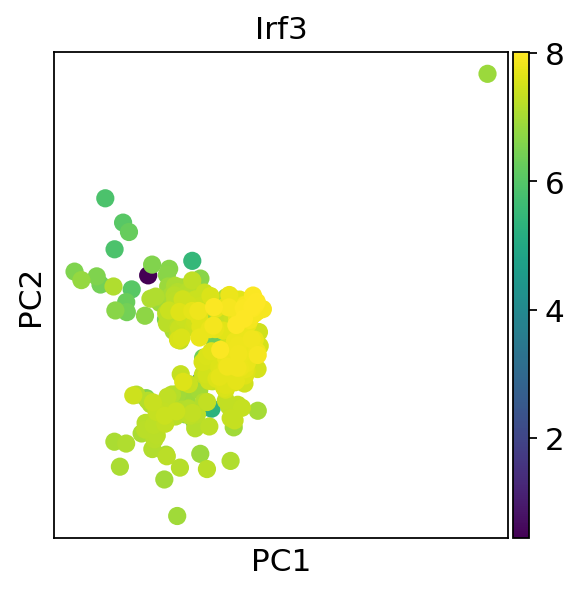

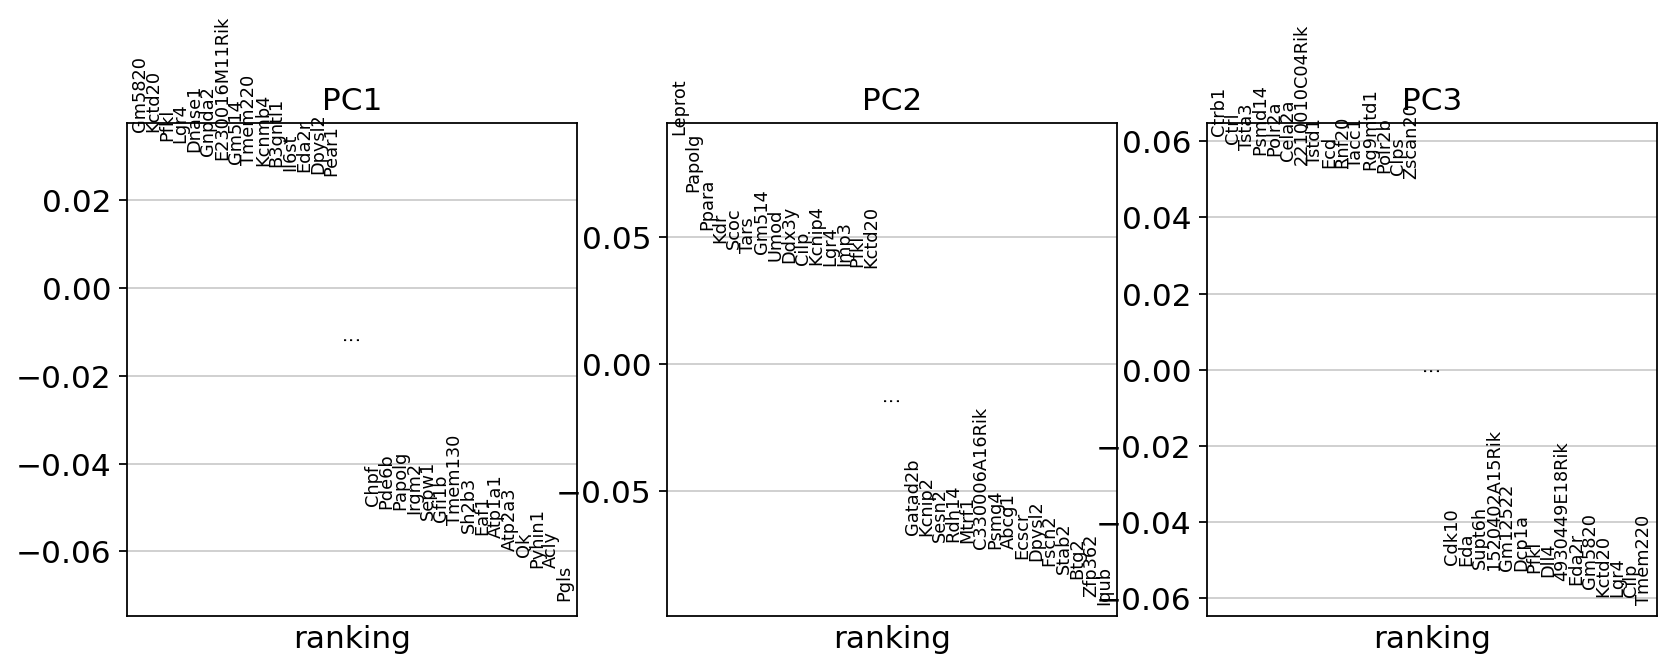

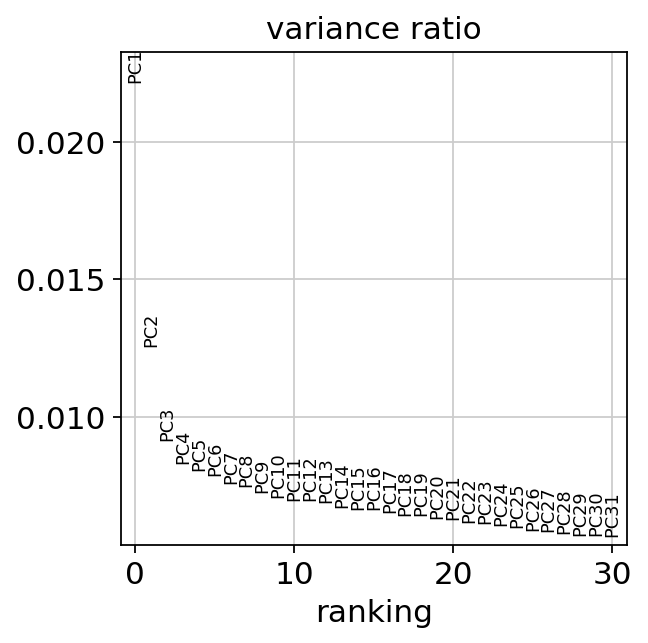

In [48]:
sc.pl.pca_overview(B, color='Irf3') #scatter plot of PC1 vs PC2 for the top higly expressed gene

PCA above depicts PC1 vs PC2 in top higly expressed gene. The variance ratio graph shows explained variance of PCA dimensions

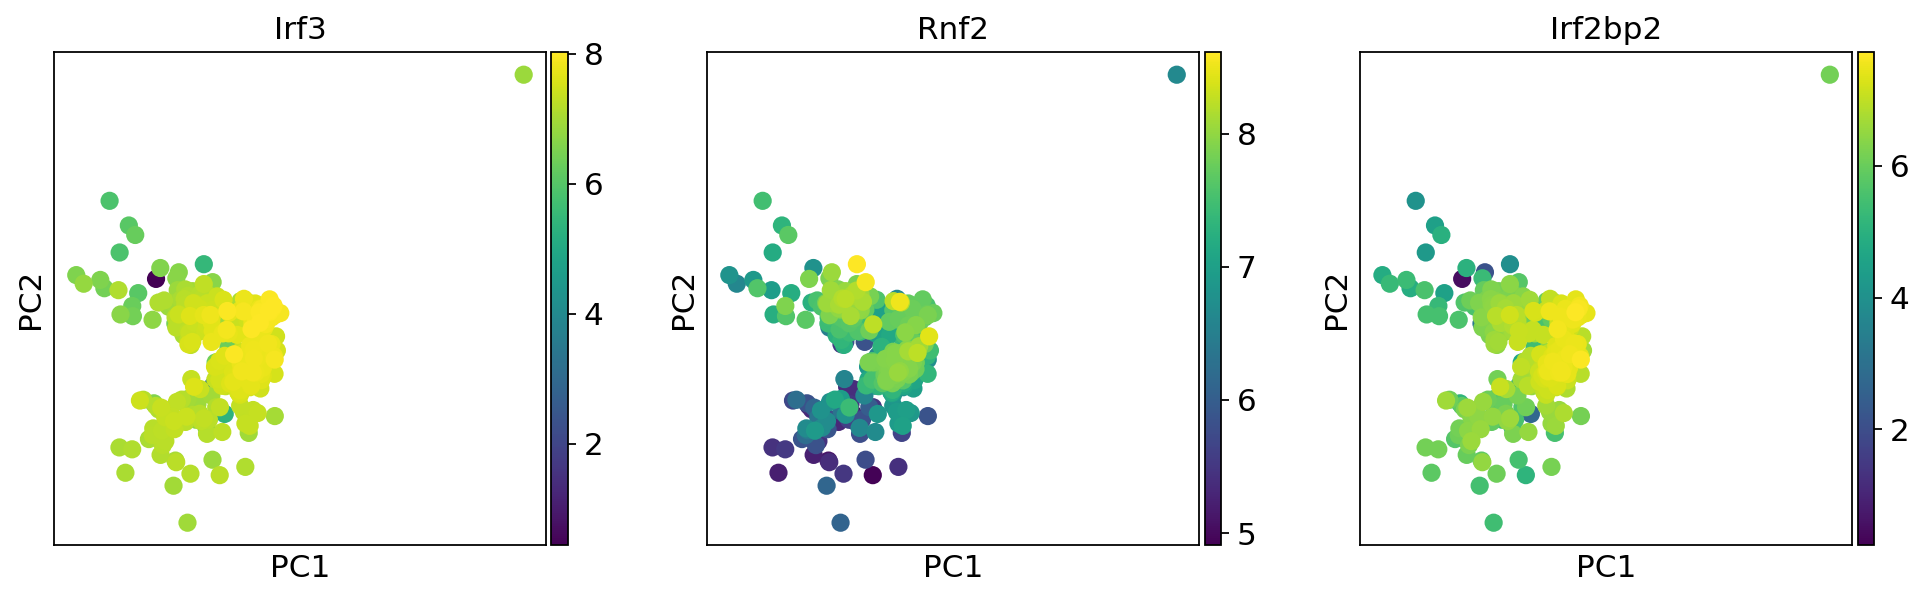

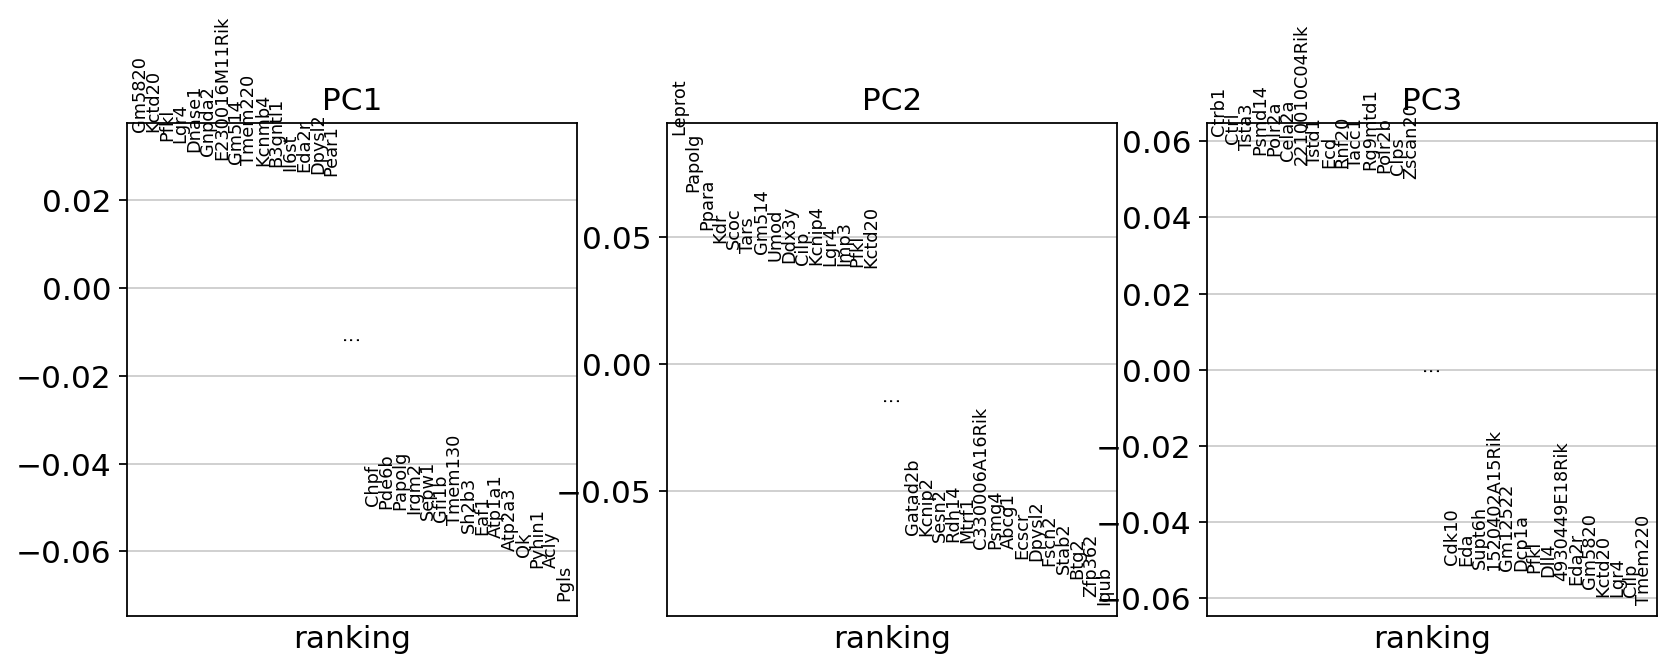

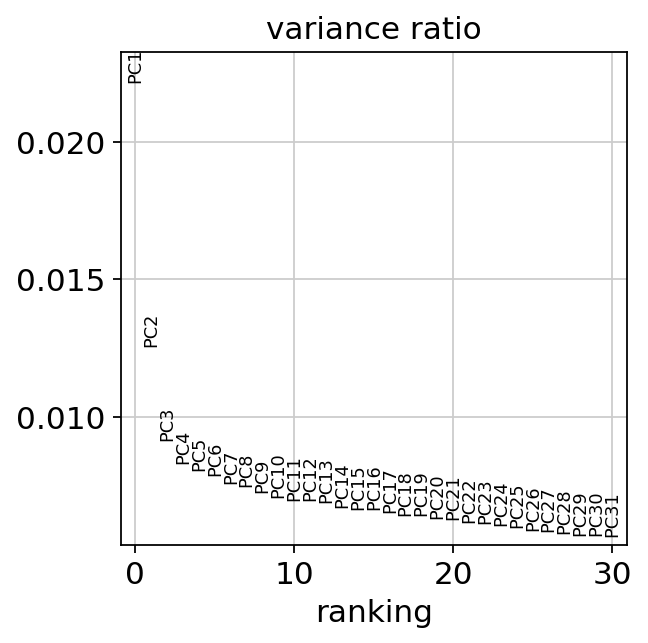

In [49]:
sc.pl.pca_overview(B, color=['Irf3','Rnf2', 'Irf2bp2']) #scatter plot of PC1 vs PC2 for the top 3 genes

PCA above depicts PC1 vs PC2 in top three higly expressed genes. The variance ratio graph shows explained variance of PCA dimensions

**Determination of the number of PCs to keep**

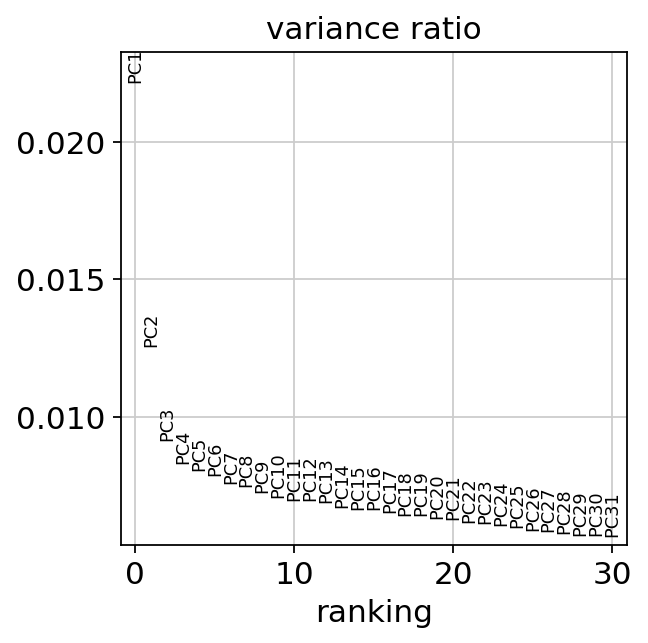

In [50]:
sc.pl.pca_variance_ratio(B) #Determination of the number of PCs to keep

We will keep 3 PCs

In [51]:
B.write('/content/drive/My Drive/Beta_Cell_Metabolism/Beta_Clustering/B_PCA.h5ad') #save the PCA file 

**CLUSTERING**

**CLUSTERING OF CELLS:**
<br>
To identify the cell types and states and as well as find differences between different groups, we group the cells in the process called clustering.  We can define the group of cells with similar expression profiles using unsupervised clustering.

In [52]:
B = sc.read('/content/drive/My Drive/Beta_Cell_Metabolism/Beta_Clustering/B_PCA.h5ad') #read the PCA file

In [53]:
B #To inspect general info about the normalized object B which has highly variable genes after PCA

AnnData object with n_obs × n_vars = 447 × 5344
    obs: 'cell', 'plate.barcode', 'mouse.id', 'tissue', 'subtissue', 'FACS.selection', 'mouse.sex', 'method', 'cell_ontology_class', 'cell_ontology_id', 'free_annotation', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_ERCC', 'pct_counts_ERCC'
    var: 'n_cells', 'ERCC', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'hvg', 'pca'
    obsm: 'X_pca'
    varm: 'PCs'

The B subset after HVG, after scaling and PCA

**Computation of the neighbourhood graph**

In [54]:
sc.pp.neighbors(B, n_neighbors=10, n_pcs=10) #To compute the neighbours

computing neighbors
    using 'X_pca' with n_pcs = 10
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:03)


In [55]:
B.uns #To inspect the unstructured annotation

OverloadedDict, wrapping:
	{'hvg': {'flavor': 'seurat'}, 'pca': {'params': {'use_highly_variable': True, 'zero_center': True}, 'variance': array([114.188545,  64.61209 ,  46.990536,  42.672794,  41.36265 ,
        40.51974 ,  39.052948,  38.449043,  37.354897,  36.415558,
        35.879196,  35.716183,  35.449768,  34.424305,  34.19345 ,
        34.162888,  33.603195,  33.03423 ,  32.9202  ,  32.390755,
        32.194443,  31.640772,  31.42555 ,  31.126467,  30.728031,
        30.221045,  29.98625 ,  29.5407  ,  29.236254,  29.210794,
        28.987558,  28.53047 ,  28.445755,  28.304787,  27.720512,
        27.497961,  26.955688,  26.908886,  26.706066,  26.423513,
        26.322866,  26.076328,  25.787256,  25.72408 ,  25.521591,
        25.425585,  25.103336,  24.938734,  24.502882,  24.451117],
      dtype=float32), 'variance_ratio': array([0.02216258, 0.01254041, 0.00912028, 0.00828226, 0.00802798,
       0.00786438, 0.00757969, 0.00746248, 0.00725012, 0.00706781,
       0.0069637

**Visualisation of the neighbourhood graph**

In [56]:
sc.tl.umap (B) #To compute the neighbourhood graph using UMAP

computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:01)


In [57]:
B #creates X_umap Column

AnnData object with n_obs × n_vars = 447 × 5344
    obs: 'cell', 'plate.barcode', 'mouse.id', 'tissue', 'subtissue', 'FACS.selection', 'mouse.sex', 'method', 'cell_ontology_class', 'cell_ontology_id', 'free_annotation', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_ERCC', 'pct_counts_ERCC'
    var: 'n_cells', 'ERCC', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'hvg', 'pca', 'neighbors', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

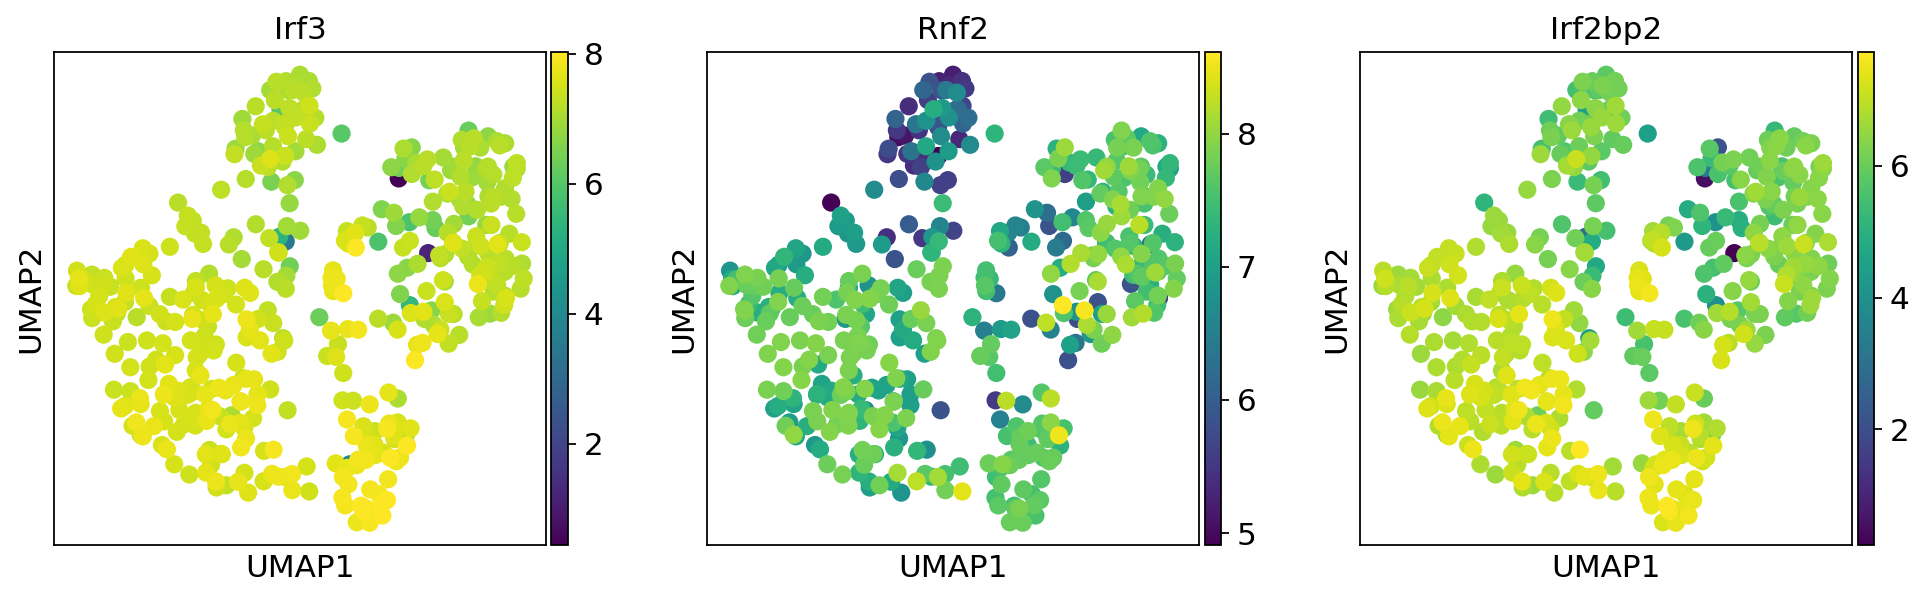

In [58]:
sc.pl.umap(B, color=['Irf3','Rnf2', 'Irf2bp2']) #To plot the neighborhood graph so that we can place similiar cells together

**Clustering the neighbourhood graph**
<br>
Clustering of the neighbourhood graph by Leiden

In [59]:
#installing and importing the library leiden for finding the clusters
!pip3 install leidenalg 
import leidenalg 

     |████████████████████████████████| 2.4MB 2.8MB/s 
     |████████████████████████████████| 3.2MB 17.9MB/s 


In [60]:
 sc.tl.leiden(B, resolution=0.09) #To compute the clusters

running Leiden clustering
    finished: found 3 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:00)


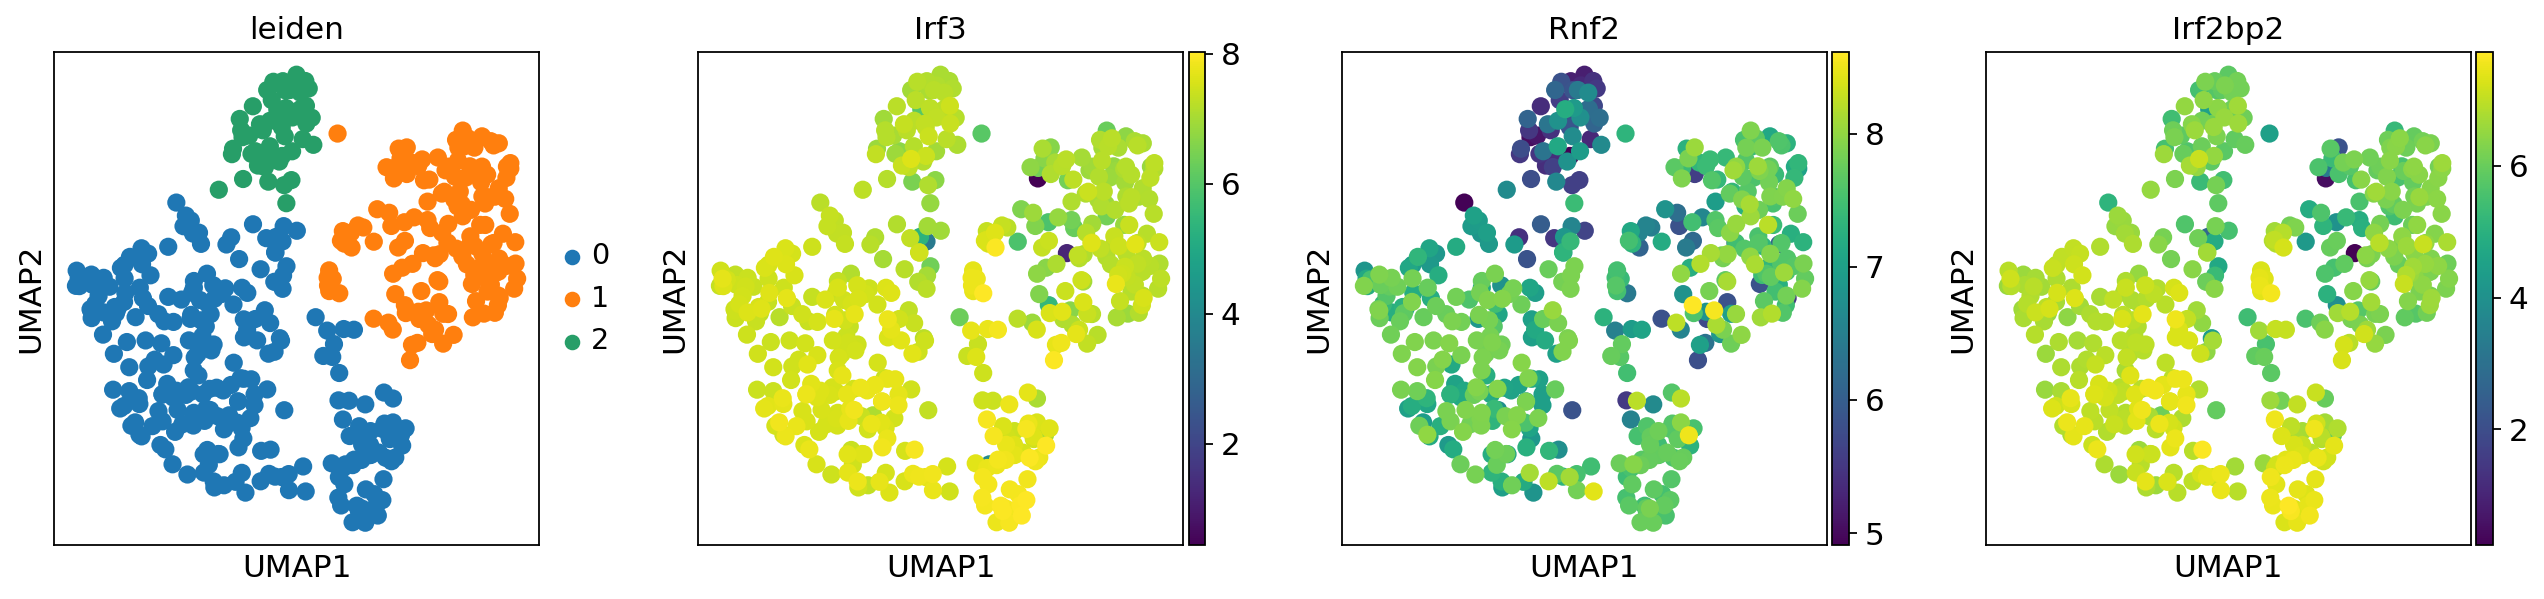

In [61]:
sc.pl.umap (B, color=['leiden','Irf3','Rnf2', 'Irf2bp2']) #to plot a UMAP of the top genes according to leiden clusters

The leiden clustering produces 3 clusters and the umap of genes shows the three different annotations spread across three different clusters 

In [62]:
B.write('/content/drive/My Drive/Beta_Cell_Metabolism/Beta_Clustering/B_Clustering.h5ad')#save the clustering file 

**FINDING MARKER GENES**

Wilcoxon Rank Sum Test 
<br> This test is used to find the marker genes 

In [63]:
B = sc.read('/content/drive/My Drive/Beta_Cell_Metabolism/Beta_Clustering/B_Clustering.h5ad') #read the clustering file 

In [64]:
B #To inspect the general info about the object

AnnData object with n_obs × n_vars = 447 × 5344
    obs: 'cell', 'plate.barcode', 'mouse.id', 'tissue', 'subtissue', 'FACS.selection', 'mouse.sex', 'method', 'cell_ontology_class', 'cell_ontology_id', 'free_annotation', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_ERCC', 'pct_counts_ERCC', 'leiden'
    var: 'n_cells', 'ERCC', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'hvg', 'leiden', 'leiden_colors', 'neighbors', 'pca', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

ranking genes
    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:00)


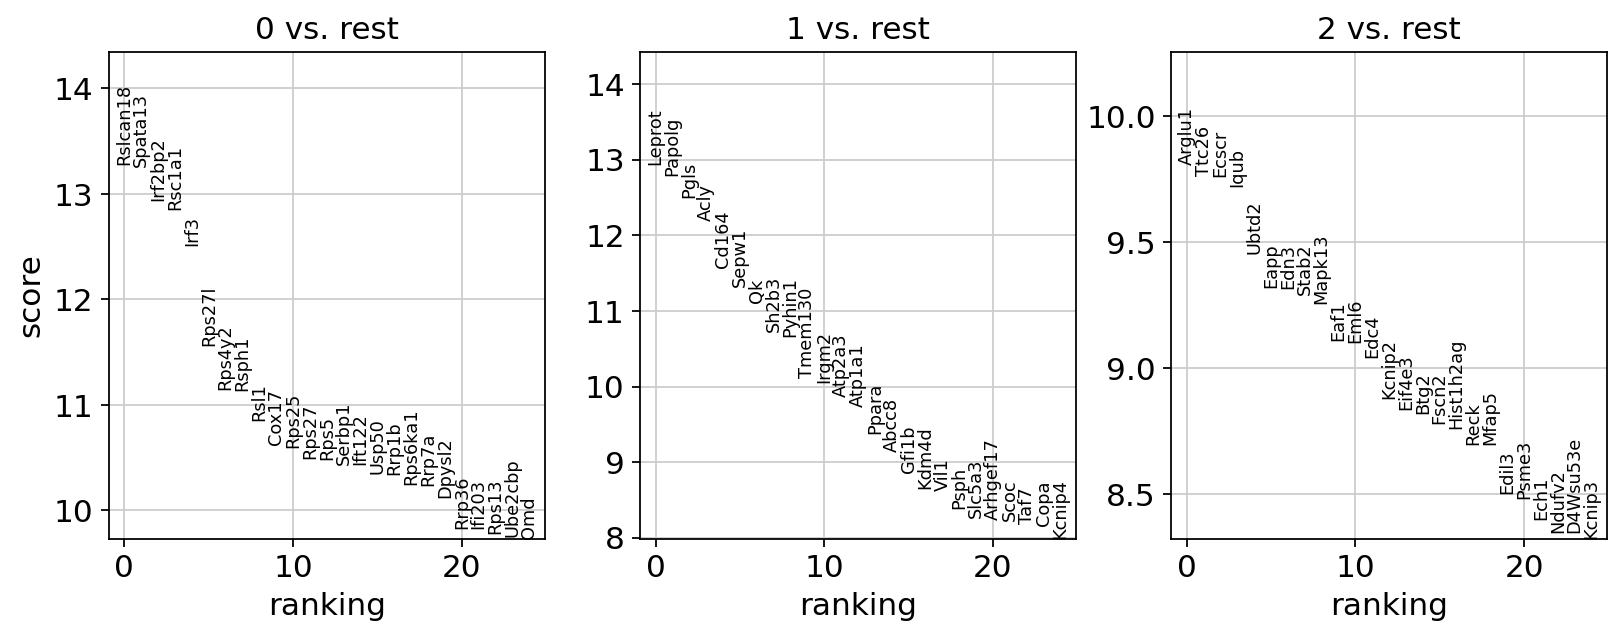

In [65]:
sc.tl.rank_genes_groups( B ,'leiden', method='wilcoxon', bool = True, int=100) #find the marker genes using the method wilcoxon
sc.pl.rank_genes_groups(B, n_genes=25, sharey=False) #plot the marker genes 

In [66]:
B.write('/content/drive/My Drive/Beta_Cell_Metabolism/Beta_Clustering/B_Wilcoxon.h5ad') #save the file containing the marker genes

In [67]:
pd.DataFrame(B.uns['rank_genes_groups']['names']).head(5) #To view the first 5 rows of the dataframe of the marker genes 

,0,1,2
0,Rslcan18,Leprot,Arglu1
1,Spata13,Papolg,Ttc26
2,Irf2bp2,Pgls,Ecscr
3,Rsc1a1,Acly,Iqub
4,Irf3,Cd164,Ubtd2


In this the top expressed genes are found in cluster no.

Irf3 - Cluster 0

Rnf2 - Not found

Irf2bp2 - Cluster 0

In [68]:
pd.DataFrame(B.uns['rank_genes_groups']['names']).tail(5) #To view the last 5 rows of the dataframe of the marker genes 

,0,1,2
17018,Irgm2,Psmg4,Rrm2b
17019,Atp2a3,Yod1,Rps6ka1
17020,Pyhin1,Ttc26,Rrp1
17021,Acly,Spata13,Rps27
17022,Pgls,Dpysl2,Rnf2


None of the top three expressed genes are found here

**Visualisation of expression of the marker genes**
<br>
The marker genes will be more expressed in the clusters for which they are markers and we can see that through visualising them

In [69]:
B = sc.read('/content/drive/My Drive/Beta_Cell_Metabolism/Beta_Clustering/B_Wilcoxon.h5ad') #read the file containing the marker genes

In [70]:
B #To inspect general info about the normalized object B which has highly variable genes after PCA, UMAP, Leiden clustering, marker genes with wilcoxon

AnnData object with n_obs × n_vars = 447 × 5344
    obs: 'cell', 'plate.barcode', 'mouse.id', 'tissue', 'subtissue', 'FACS.selection', 'mouse.sex', 'method', 'cell_ontology_class', 'cell_ontology_id', 'free_annotation', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_ERCC', 'pct_counts_ERCC', 'leiden'
    var: 'n_cells', 'ERCC', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'hvg', 'leiden', 'leiden_colors', 'neighbors', 'pca', 'rank_genes_groups', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

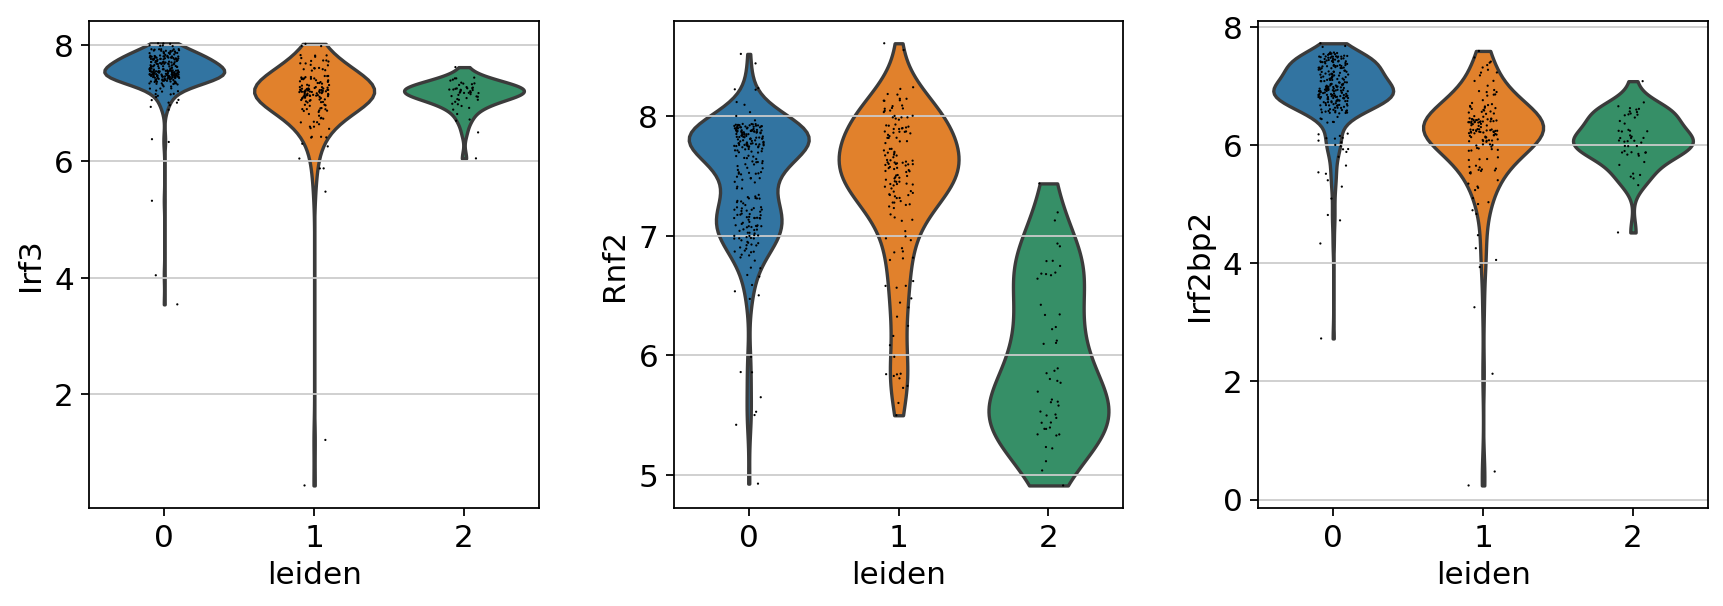

In [71]:
sc.pl.violin(B, ['Irf3','Rnf2', 'Irf2bp2'], groupby='leiden') #To plot the expression of the highly expressed genes in different clusters

In this the top expressed genes are found in cluster no.

Irf3 - Cluster 0

Rnf2 - Cluster 1

Irf2bp2 - Cluster 0

Highest expressed genes:

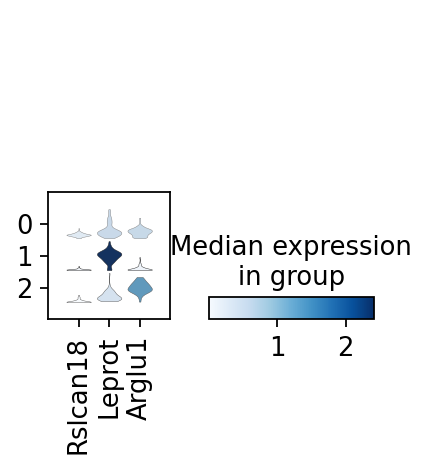

In [72]:
sc.pl.stacked_violin(B, var_names =['Rslcan18',	'Leprot',	'Arglu1'], groupby='leiden', rotation=90);  #taking the marker genes from wilcoxon test and plotting against the clusters

We can see that these genes are highly expressed in cluster number:

Rslcan18 - Cluster 2


Leprot - Cluster 1


Arglu1 - Cluster 2

Lowest expressed genes:

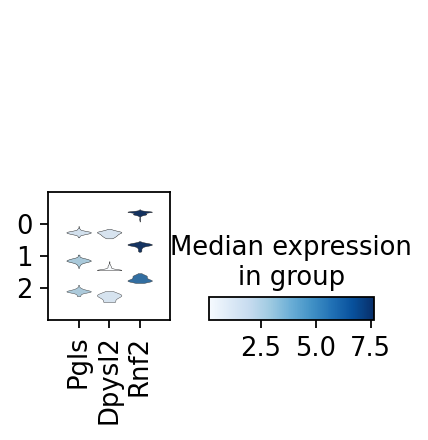

In [73]:
sc.pl.stacked_violin(B, var_names =['Pgls',	'Dpysl2',	'Rnf2'], groupby='leiden', rotation=90);  #taking the marker genes from wilcoxon test and plotting against the clusters

Lowest expressed genes in cluster  
 
Pgls	-1,2

Dpysl2	-0,2

Rnf2 - 0,1,2

    using 'X_pca' with n_pcs = 50
Storing dendrogram info using `.uns["dendrogram_['leiden']"]`
    using 'X_pca' with n_pcs = 50
Storing dendrogram info using `.uns['dendrogram_leiden']`


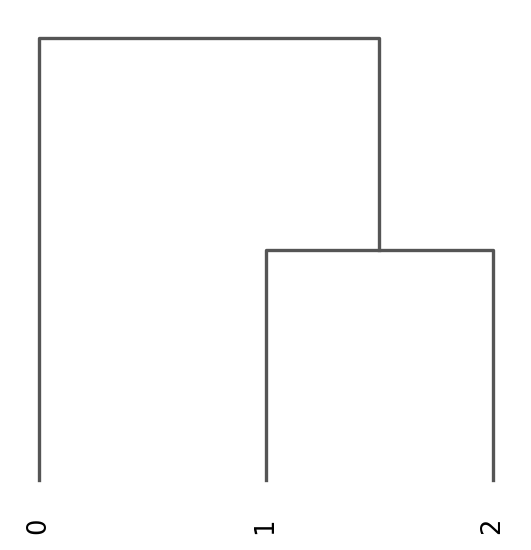

In [74]:
#computing the dendrogram to which clusters are similiar
sc.tl.dendrogram (B,'leiden', n_pcs=50)
sc.pl.dendrogram(B, 'leiden', show =True)

Cluster number 2 and 1 are related which is related to cluster number 0

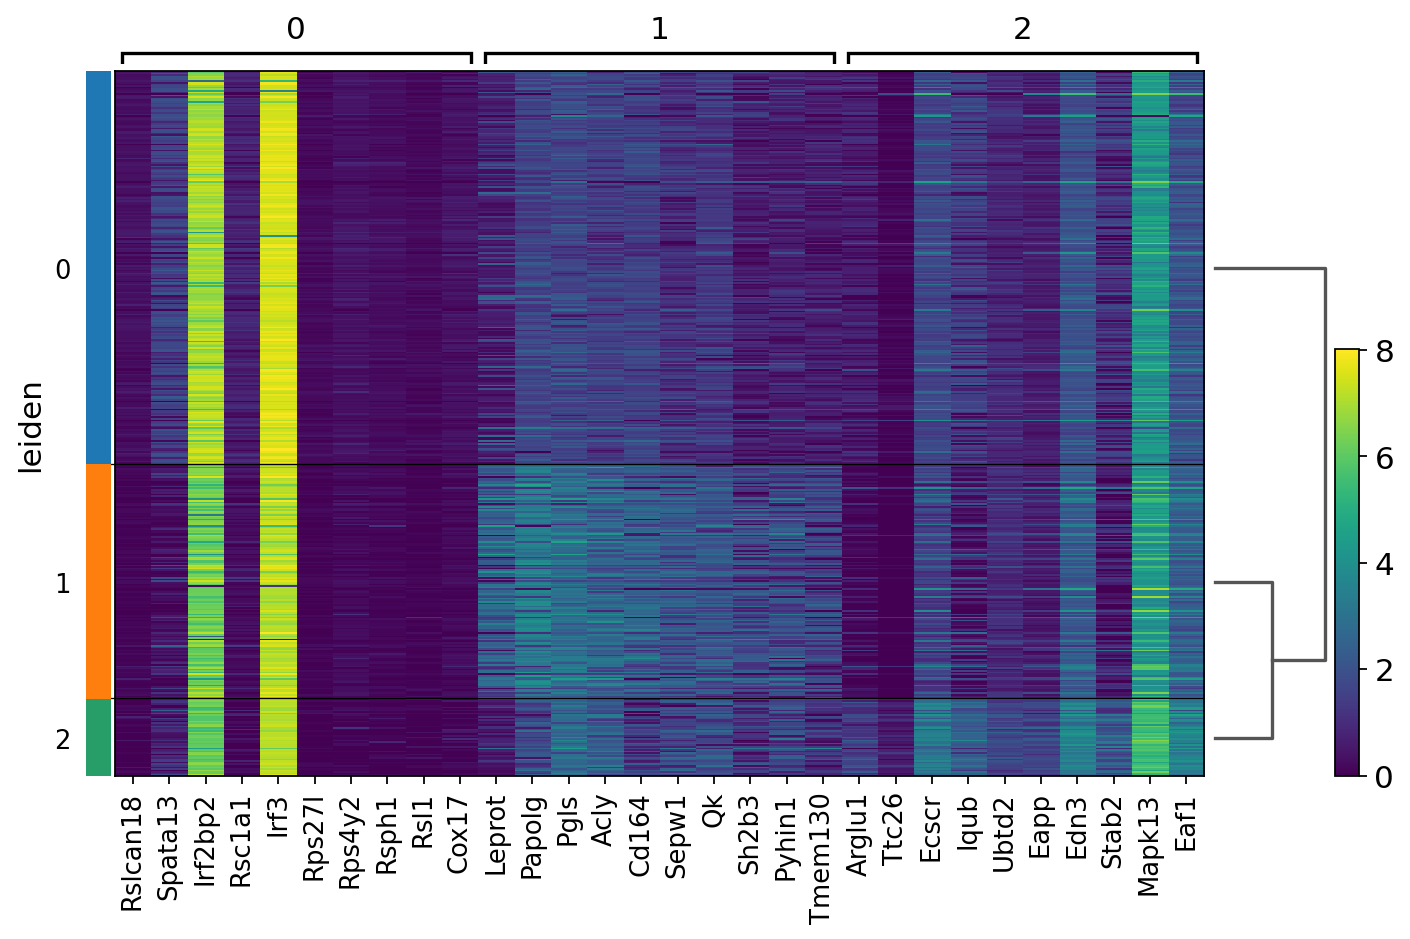

In [75]:
sc.pl.rank_genes_groups_heatmap(B, n_genes=10, show_gene_labels = True ) #computing a heatmap of the gene expression of cells for top 20 marker genes

Highly expressed in cluster number (only highly expressed genes)

Rslcan18 -None

Leprot - 1

Arglu1 -2


**Comparision of the marker genes between the clusters**

ranking genes
    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:00)


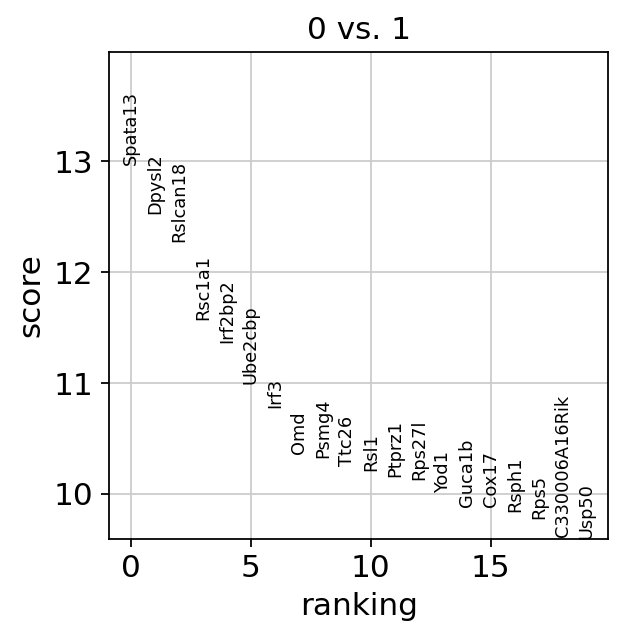

In [76]:
#computing the marker genes which can differentiate one cluster from one or many clusters
sc.tl.rank_genes_groups(B, groupby='leiden',groups=['0'], reference='1', method='wilcoxon')
sc.pl.rank_genes_groups(B,groups=['0'])

Spata13 is most the most differentially expressed gene between cells in cluster 0 and cells in cluster 1

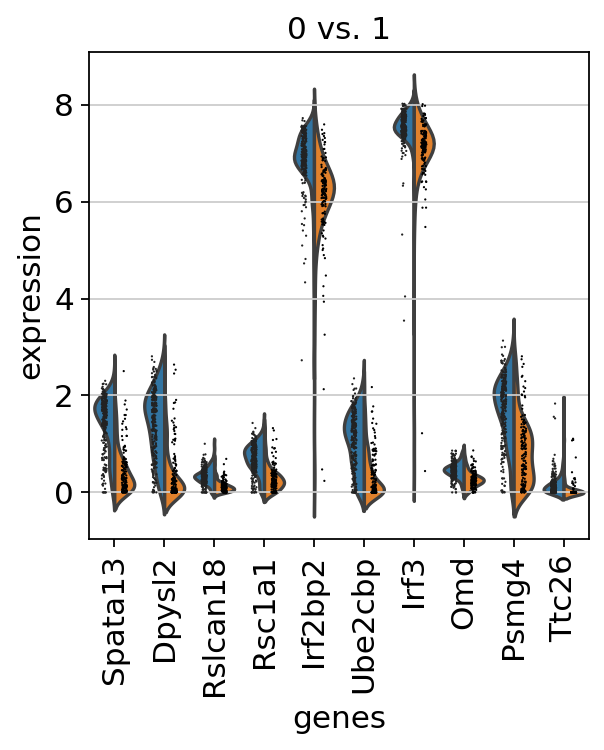

In [77]:
sc.pl.rank_genes_groups_violin(B, n_genes=10) #visualisation of the marker genes in cluster 0 and cluster 1

**GENE TYPE ANNOTATION** : The pancreatic B cells are classified into different functional groups which was found via literature 

In [78]:
new_cluster_names = [
    'Binding activity', 'Growth Factors', 'Regulatory']
B.rename_categories('leiden', new_cluster_names) #labelling the clusters with function names 

Omitting rank_genes_groups/names as old categories do not match.
Omitting rank_genes_groups/scores as old categories do not match.
Omitting rank_genes_groups/pvals as old categories do not match.
Omitting rank_genes_groups/pvals_adj as old categories do not match.
Omitting rank_genes_groups/logfoldchanges as old categories do not match.


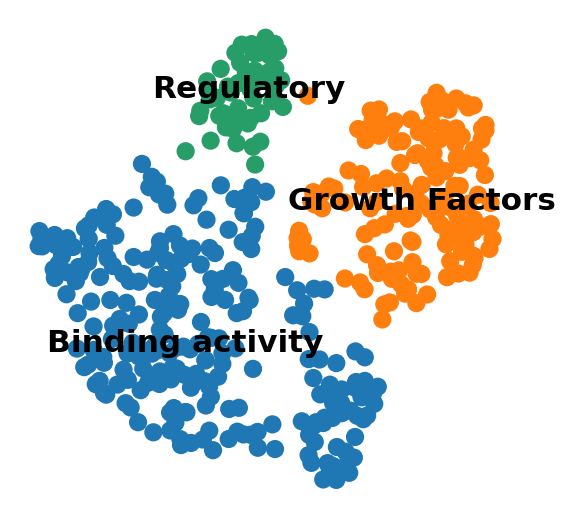

In [79]:
sc.pl.umap(B, color='leiden', legend_loc='on data', title='', frameon=False) #plotting the labelled clusters using UMAP

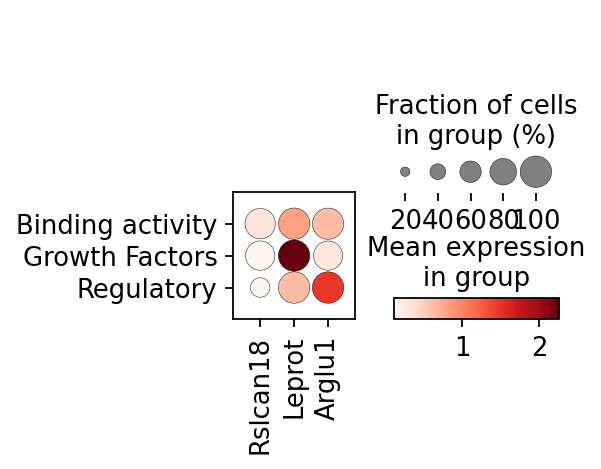

In [80]:
sc.pl.dotplot(B, ['Rslcan18',	'Leprot',	'Arglu1'], groupby='leiden'); #Visualisation through a scatter plot

We can infer 
<br>
Rslcan18 gene is prevalent in Binding activity label
<br>
Leprot is prevalent in Growth Factors label
<br>
Arglu1 is prevalent in Regulatory label
<br>


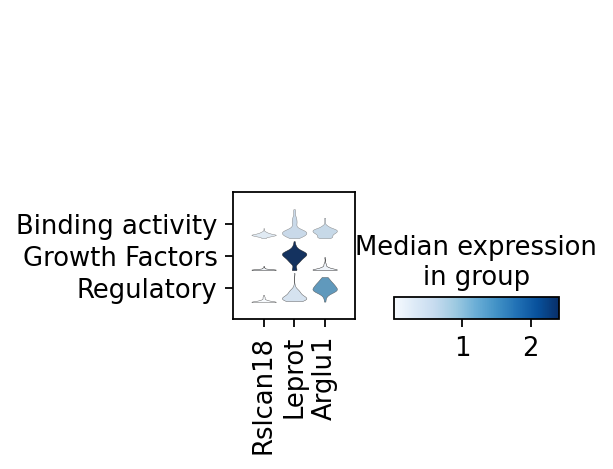

In [81]:
sc.pl.stacked_violin(B, ['Rslcan18','Leprot',	'Arglu1'], groupby='leiden', rotation=90); #Visualisation through a violin plot

We can infer 
<br>
Rslcan18 gene is prevalent in Binding activity label
<br>
Leprot is prevalent in Growth Factors label
<br>
Arglu1 is prevalent in Regulatory label
<br>


In [82]:
B #To inspect general info about the data

AnnData object with n_obs × n_vars = 447 × 5344
    obs: 'cell', 'plate.barcode', 'mouse.id', 'tissue', 'subtissue', 'FACS.selection', 'mouse.sex', 'method', 'cell_ontology_class', 'cell_ontology_id', 'free_annotation', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_ERCC', 'pct_counts_ERCC', 'leiden'
    var: 'n_cells', 'ERCC', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'hvg', 'leiden', 'leiden_colors', 'neighbors', 'pca', 'rank_genes_groups', 'umap', "dendrogram_['leiden']", 'dendrogram_leiden'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'